# 4. Aggregation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_students = pd.read_csv('data/students.csv')
df_summarized_orders = pd.read_csv('data/summarized_orders.csv')
df_orders = pd.read_csv('data/orders2.csv')

In [3]:
df_summarized_orders.DATE = pd.to_datetime(df_summarized_orders.DATE)
df_orders.DATETIME = pd.to_datetime(df_orders.DATETIME)

## The Basics of Aggregation

In [4]:
df_students.head()

,FIRST_NAME,LAST_NAME,YEAR,HOME_STATE,AGE,CALC_101_FINAL,ENGLISH_101_FINAL
0,Daniel,Smith,1,NY,18,90.0,80.0
1,Ben,Leibstrom,1,NY,19,80.0,NaN
2,Kavita,Kanabar,1,PA,19,NaN,NaN
3,Linda,Thiel,4,CA,22,60.0,40.0
4,Omar,Reichel,2,OK,21,70.0,50.0


In [5]:
df_students.groupby('YEAR').AGE.mean()

YEAR
1    18.2
2    20.0
3    20.0
4    22.0
Name: AGE, dtype: float64

In [6]:
df_students.groupby('YEAR').AGE.mean().reset_index()

,YEAR,AGE
0,1,18.2
1,2,20.0
2,3,20.0
3,4,22.0


In [7]:
df_students.groupby(['YEAR', 'HOME_STATE']).AGE.mean()

YEAR  HOME_STATE
1     FL            17.5
      NY            18.5
      PA            19.0
2     HI            19.0
      OK            21.0
3     NY            20.0
4     CA            22.0
Name: AGE, dtype: float64

In [8]:
df_students.groupby(['YEAR', 'HOME_STATE']).AGE.mean().reset_index()

,YEAR,HOME_STATE,AGE
0,1,FL,17.5
1,1,NY,18.5
2,1,PA,19.0
3,2,HI,19.0
4,2,OK,21.0
5,3,NY,20.0
6,4,CA,22.0


In [9]:
df_students.groupby('YEAR')['AGE'].mean()

YEAR
1    18.2
2    20.0
3    20.0
4    22.0
Name: AGE, dtype: float64

<AxesSubplot:xlabel='YEAR'>

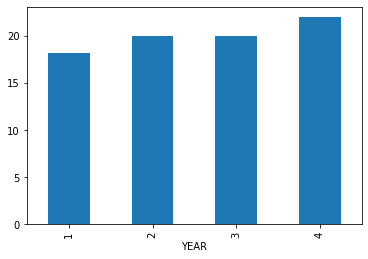

In [10]:
df_students.groupby('YEAR').AGE.mean().plot(kind='bar')

In [11]:
# Challenge: Average Number of Orders Per Restaurant
df_summarized_orders.groupby('RESTAURANT_NAME').NUM_ORDERS.mean()

RESTAURANT_NAME
Bryant Park         871.436782
Columbia            687.150685
Flatiron            772.556164
Midtown             891.136986
NYU                1180.438356
Upper East Side     774.650704
Upper West Side     770.372603
Williamsburg        862.120548
Name: NUM_ORDERS, dtype: float64

In [12]:
df_orders.RESTAURANT_NAME.value_counts() / 365

NYU                1180.438356
Midtown             891.136986
Williamsburg        862.120548
Flatiron            772.556164
Upper West Side     770.372603
Upper East Side     753.427397
Columbia            687.150685
Bryant Park         623.136986
Name: RESTAURANT_NAME, dtype: float64

### Aggregating Functions

In [13]:
df_orders.groupby('RESTAURANT_NAME').ORDER_ID.size()

RESTAURANT_NAME
Bryant Park        227445
Columbia           250810
Flatiron           281983
Midtown            325265
NYU                430860
Upper East Side    275001
Upper West Side    281186
Williamsburg       314674
Name: ORDER_ID, dtype: int64

In [14]:
df_orders.groupby('RESTAURANT_NAME').size()

RESTAURANT_NAME
Bryant Park        227445
Columbia           250810
Flatiron           281983
Midtown            325265
NYU                430860
Upper East Side    275001
Upper West Side    281186
Williamsburg       314674
dtype: int64

In [15]:
df_orders.groupby('RESTAURANT_NAME').count()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
RESTAURANT_NAME,,,,,,,,,,,,,,
Bryant Park,227445,227445,227445,227445,227445,227445,216767,216767,216767,216767,216767,216767,216767,216767
Columbia,250810,250810,250810,250810,250810,250810,239406,239406,239406,239406,239406,239406,239406,239406
Flatiron,281983,281983,281983,281983,281983,281983,268909,268909,268909,268909,268909,268909,268909,268909
Midtown,325265,325265,325265,325265,325265,325265,309502,309502,309502,309502,309502,309502,309502,309502
NYU,430860,430860,430860,430860,430860,430860,411253,411253,411253,411253,411253,411253,411253,411253
Upper East Side,275001,275001,275001,275001,275001,275001,261957,261957,261957,261957,261957,261957,261957,261957
Upper West Side,281186,281186,281186,281186,281186,281186,268023,268023,268023,268023,268023,268023,268023,268023
Williamsburg,314674,314674,314674,314674,314674,314674,299822,299822,299822,299822,299822,299822,299822,299822


In [16]:
df_orders.RESTAURANT_NAME.value_counts()

NYU                430860
Midtown            325265
Williamsburg       314674
Flatiron           281983
Upper West Side    281186
Upper East Side    275001
Columbia           250810
Bryant Park        227445
Name: RESTAURANT_NAME, dtype: int64

In [17]:
# Challenge: Number of Orders Per Restaurant by Type
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size()

RESTAURANT_NAME  TYPE    
Bryant Park      DELIVERY     15613
                 IN_STORE    171494
                 PICKUP       40338
Columbia         DELIVERY     25247
                 IN_STORE    182603
                 PICKUP       42960
Flatiron         DELIVERY     28859
                 IN_STORE    204607
                 PICKUP       48517
Midtown          DELIVERY     22380
                 IN_STORE    244980
                 PICKUP       57905
NYU              DELIVERY     43310
                 IN_STORE    314832
                 PICKUP       72718
Upper East Side  DELIVERY     52080
                 IN_STORE    180605
                 PICKUP       42316
Upper West Side  DELIVERY     53337
                 IN_STORE    184588
                 PICKUP       43261
Williamsburg     DELIVERY     31822
                 IN_STORE    229427
                 PICKUP       53425
dtype: int64

### Using unstack()

In [18]:
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size().unstack()

TYPE,DELIVERY,IN_STORE,PICKUP
RESTAURANT_NAME,,,
Bryant Park,15613,171494,40338
Columbia,25247,182603,42960
Flatiron,28859,204607,48517
Midtown,22380,244980,57905
NYU,43310,314832,72718
Upper East Side,52080,180605,42316
Upper West Side,53337,184588,43261
Williamsburg,31822,229427,53425


In [19]:
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size().unstack(0)

RESTAURANT_NAME,Bryant Park,Columbia,Flatiron,Midtown,NYU,Upper East Side,Upper West Side,Williamsburg
TYPE,,,,,,,,
DELIVERY,15613,25247,28859,22380,43310,52080,53337,31822
IN_STORE,171494,182603,204607,244980,314832,180605,184588,229427
PICKUP,40338,42960,48517,57905,72718,42316,43261,53425


In [20]:
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size().unstack().transpose()

RESTAURANT_NAME,Bryant Park,Columbia,Flatiron,Midtown,NYU,Upper East Side,Upper West Side,Williamsburg
TYPE,,,,,,,,
DELIVERY,15613,25247,28859,22380,43310,52080,53337,31822
IN_STORE,171494,182603,204607,244980,314832,180605,184588,229427
PICKUP,40338,42960,48517,57905,72718,42316,43261,53425


## Calculations on Multiple Columns

In [21]:
df_orders.groupby('RESTAURANT_NAME')[['DRINKS', 'COOKIES']].mean()

,DRINKS,COOKIES
RESTAURANT_NAME,,
Bryant Park,0.098138,0.261294
Columbia,0.066572,0.259049
Flatiron,0.097637,0.259161
Midtown,0.126128,0.260683
NYU,0.075769,0.258898
Upper East Side,0.118145,0.257603
Upper West Side,0.097032,0.260475
Williamsburg,0.096446,0.258750


In [22]:
df_orders.groupby('RESTAURANT_NAME').mean()

,DRINKS,COOKIES
RESTAURANT_NAME,,
Bryant Park,0.098138,0.261294
Columbia,0.066572,0.259049
Flatiron,0.097637,0.259161
Midtown,0.126128,0.260683
NYU,0.075769,0.258898
Upper East Side,0.118145,0.257603
Upper West Side,0.097032,0.260475
Williamsburg,0.096446,0.258750


In [23]:
df_orders.groupby('RESTAURANT_NAME').agg(
    AVG_DRINKS = ('DRINKS', 'mean'), 
    MAIN_COUNT = ('MAIN', 'count'))

,AVG_DRINKS,MAIN_COUNT
RESTAURANT_NAME,,
Bryant Park,0.098138,216767
Columbia,0.066572,239406
Flatiron,0.097637,268909
Midtown,0.126128,309502
NYU,0.075769,411253
Upper East Side,0.118145,261957
Upper West Side,0.097032,268023
Williamsburg,0.096446,299822


## More Complex Grouping

### Grouping Using a Series

In [24]:
df_orders['HAS_DRINK'] = (df_orders.DRINKS > 0)

In [25]:
df_orders.groupby('HAS_DRINK').COOKIES.mean()

HAS_DRINK
False    0.259543
True     0.258149
Name: COOKIES, dtype: float64

In [26]:
df_orders = df_orders.drop(columns='HAS_DRINK')

In [27]:
df_orders.groupby(df_orders.DRINKS > 0).COOKIES.mean()

DRINKS
False    0.259543
True     0.258149
Name: COOKIES, dtype: float64

### Grouping Using Dates and Times

In [28]:
df_orders.set_index('DATETIME')

,ORDER_ID,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
DATETIME,,,,,,,,,,,,,,
2018-10-11 17:25:50,O1820060,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
2018-05-31 11:35:00,O1011112,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2018-04-21 18:12:57,O752854,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
2018-11-17 12:50:52,O2076864,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
2018-11-04 18:37:24,O1988898,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-04 17:59:51,O420721,R10004,IN_STORE,0.0,2.0,I3,I5,I15,I12,NYU,Herb Roasted Chicken Marketbowl,Classic Brown Rice,Snap Peas,Cashew Kale Caesar
2018-09-29 13:05:36,O1738792,R10007,PICKUP,0.0,0.0,I1,I5,I15,I15,Upper West Side,Spicy Meatballs Marketbowl,Classic Brown Rice,Snap Peas,Snap Peas
2018-05-07 18:23:24,O858342,R10006,DELIVERY,0.0,0.0,I2,I6,I9,I8,Upper East Side,Grilled Organic Tofu Marketbowl,Farm Greens with Mint,Jasper Hill Mac & Cheese,Cauliflower with Garlic and Parmesan


### Grouping Using Dates and Times

In [29]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387224 entries, 0 to 2387223
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ORDER_ID         object        
 1   DATETIME         datetime64[ns]
 2   RESTAURANT_ID    object        
 3   TYPE             object        
 4   DRINKS           float64       
 5   COOKIES          float64       
 6   MAIN             object        
 7   BASE             object        
 8   SIDE_1           object        
 9   SIDE_2           object        
 10  RESTAURANT_NAME  object        
 11  MAIN_NAME        object        
 12  BASE_NAME        object        
 13  SIDE_1_NAME      object        
 14  SIDE_2_NAME      object        
dtypes: datetime64[ns](1), float64(2), object(12)
memory usage: 273.2+ MB


In [30]:
(df_orders.set_index('DATETIME')
          .resample('D')
          .DRINKS
          .mean()
          .reset_index())

,DATETIME,DRINKS
0,2018-01-01,0.064363
1,2018-01-02,0.083897
2,2018-01-03,0.069347
3,2018-01-04,0.076179
4,2018-01-05,0.080892
...,...,...
360,2018-12-27,0.068607
361,2018-12-28,0.080403
362,2018-12-29,0.067626
363,2018-12-30,0.071961


<AxesSubplot:xlabel='DATETIME'>

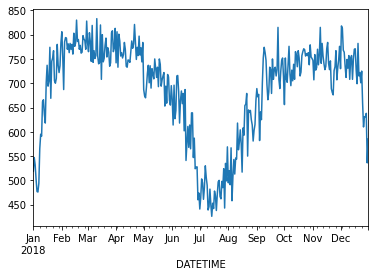

In [31]:
# Challenge: Total Orders Per Day at Columbia
(df_orders[df_orders.RESTAURANT_NAME == 'Columbia']
          .set_index('DATETIME')
          .resample('D')
          .size()
          .plot())

<AxesSubplot:xlabel='DATETIME'>

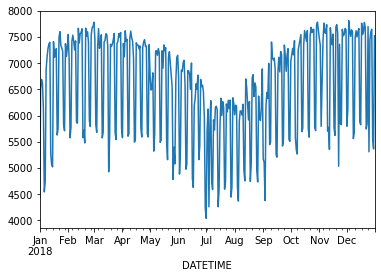

In [32]:
(df_orders.set_index('DATETIME')
          .resample('D')
          .size()
          .plot())

<AxesSubplot:xlabel='DATETIME'>

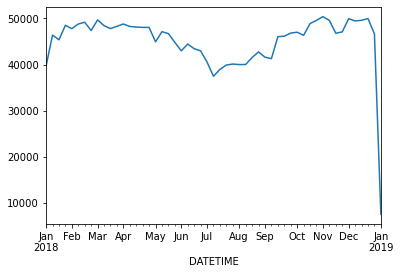

In [33]:
(df_orders.set_index('DATETIME')
          .resample('W')
          .size()
          .plot())

In [34]:
(df_orders.set_index('DATETIME')
          .resample('D')
          .size())

DATETIME
2018-01-01    4428
2018-01-02    6508
2018-01-03    6691
2018-01-04    6616
2018-01-05    6144
              ... 
2018-12-27    7594
2018-12-28    7649
2018-12-29    5560
2018-12-30    5364
2018-12-31    7524
Freq: D, Length: 365, dtype: int64

In [35]:
(df_orders.set_index('DATETIME')
          .resample('D')
          .size()
          .rolling(3)
          .mean())

DATETIME
2018-01-01            NaN
2018-01-02            NaN
2018-01-03    5875.666667
2018-01-04    6605.000000
2018-01-05    6483.666667
                 ...     
2018-12-27    6783.000000
2018-12-28    7563.000000
2018-12-29    6934.333333
2018-12-30    6191.000000
2018-12-31    6149.333333
Freq: D, Length: 365, dtype: float64

<AxesSubplot:xlabel='DATETIME'>

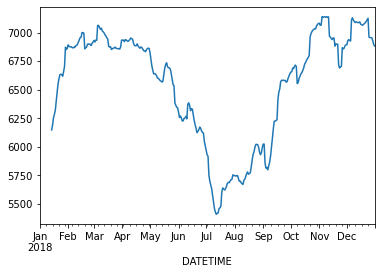

In [36]:
(df_orders.set_index('DATETIME')
           .resample('D')
           .size()
           .rolling(14)
           .mean()
           .plot())

In [37]:
(df_orders.set_index('DATETIME')
          .groupby('RESTAURANT_NAME')
          .resample('D')
          .size()
          .rename('ORDERS')
          .reset_index())

,RESTAURANT_NAME,DATETIME,ORDERS
0,Bryant Park,2018-01-01,373
1,Bryant Park,2018-01-02,789
2,Bryant Park,2018-01-03,818
3,Bryant Park,2018-01-04,782
4,Bryant Park,2018-01-05,719
...,...,...,...
2914,Williamsburg,2018-12-27,941
2915,Williamsburg,2018-12-28,941
2916,Williamsburg,2018-12-29,942
2917,Williamsburg,2018-12-30,933


In [38]:
# Challenge: Total Drinks Per Restaurant by Month
(df_orders.set_index('DATETIME')
          .groupby('RESTAURANT_NAME')
          .resample('M')
          .DRINKS
          .sum()
          .reset_index())

,RESTAURANT_NAME,DATETIME,DRINKS
0,Bryant Park,2018-01-31,1414.0
1,Bryant Park,2018-02-28,1336.0
2,Bryant Park,2018-03-31,1427.0
3,Bryant Park,2018-04-30,1478.0
4,Bryant Park,2018-05-31,2340.0
...,...,...,...
91,Williamsburg,2018-08-31,3098.0
92,Williamsburg,2018-09-30,2947.0
93,Williamsburg,2018-10-31,2533.0
94,Williamsburg,2018-11-30,2172.0


## Statistical Analysis

In [39]:
import seaborn as sns

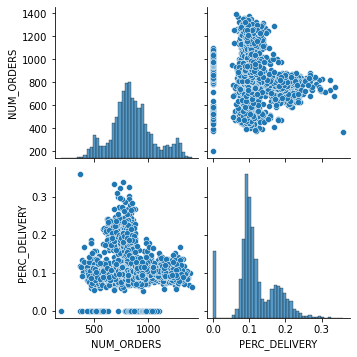

In [40]:
sns.pairplot(df_summarized_orders)

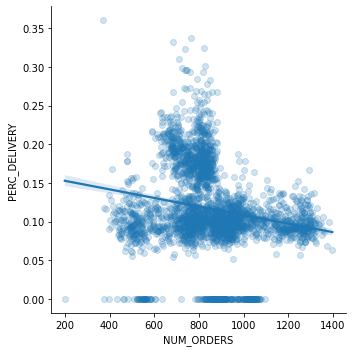

In [41]:
sns.lmplot(data=df_summarized_orders, x='NUM_ORDERS', y='PERC_DELIVERY', scatter_kws={'alpha':0.2})

In [42]:
import statsmodels.api as sm

In [47]:
x = df_summarized_orders.NUM_ORDERS
x = sm.add_constant(x)
y = df_summarized_orders.PERC_DELIVERY
model = sm.OLS(y, x)
results = model.fit()
results.summary()

/Users/mattangriffel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PERC_DELIVERY   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     112.8
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           7.26e-26
Time:                        18:10:42   Log-Likelihood:                 4208.9
No. Observations:                2806   AIC:                            -8414.
Df Residuals:                    2804   BIC:                            -8402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1638      0.005     35.979      0.000       0.155       0.173
NUM_ORDERS -5.541e-05   5.22e-06    -10.622      0.000   -6.56e-05   -4.52e-05
==============================================================================
Omnibus:                       48.599   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.225
Skew:                           0.116   Prob(JB):                     3.12e-19
Kurtosis:                       3.822   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""